<a href="https://colab.research.google.com/github/jchoquev/ProyectoTesisUnap/blob/colab/EMPLEO_DESCRIPTIVO_ENAHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen
import numpy as np


import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt

In [2]:
url=urlopen('http://iinei.inei.gob.pe/iinei/srienaho/descarga/STATA/737-Modulo05.zip')
zipfile=ZipFile(BytesIO(url.read()))

In [99]:
df=pd.read_stata(zipfile.open('737-Modulo05/enaho01a-2020-500.dta'),'ISO-8859-1',preserve_dtypes=True,convert_categoricals=False)

In [100]:
df=df[df.p500i!='00']

In [101]:
#Variable Sexo
df["sexo"]=df["p207"]
df["sexo"]=df["sexo"].replace({1:"Hombre",2:"Mujer" })

In [122]:
df['SitInformalidad']=df['ocupinf']
df["SitInformalidad"]=df["SitInformalidad"].replace({1:"Empleo Informal",2:"Empleo formal" })

Estado Civil - Mujer

In [123]:
df_EstaCivil=df
df_EstaCivil['EstCivil']=df['p209']
df_EstaCivil=df_EstaCivil[df_EstaCivil['p209']!=np.nan]
df_EstaCivil["EstCivil"]=df_EstaCivil["EstCivil"].replace({1:"Conviviente",2:"Casado(a)",3:"Viudo(a)",4:"Divorciado(a)",5:"Separado(a)",6:"Soltero(a)"})

In [ ]:
muestra=pd.crosstab(df_EstaCivil.EstCivil,columns=[df_EstaCivil.sexo[df_EstaCivil.sexo=='Mujer']],values=df_EstaCivil.fac500a,aggfunc=sum,normalize=True,colnames=[''])
muestra['labels']=["Casado(a)","Conviviente","Divorciado(a)","Separado(a)","Soltero(a)","Viudo(a)"]
muestra

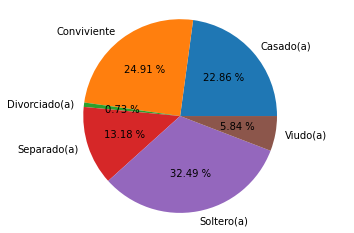

In [125]:
plt.pie(muestra.Mujer,labels=muestra.labels, autopct="%0.2f %%")
plt.axis("equal")
plt.show()

Nivel de instrucción

In [135]:
df_NivIntruc=df
df_NivIntruc['NivIntruc']=df['p301a']
df_NivIntruc=df_NivIntruc[df_NivIntruc['NivIntruc']!=np.nan]
df_NivIntruc["NivIntruc"]=df_NivIntruc["NivIntruc"].replace({1 :"Sin nivel",2 :"Inicial",3 :"Primaria incompleta",4 :"Primaria completa",5 :"Secundaria incompleta",6 :"Secundaria completa",7 :"Sup. no Universitaria Incompleta",8 :"Sup. no Universitaria Completa",9 :"Sup. Universitaria Incompleta",10 :"Sup. Universitaria Completa",11 :"Maestría/Doctorado",12:"Básica especial"})

In [ ]:
muestra=pd.crosstab(df_NivIntruc.NivIntruc,columns=[df_NivIntruc.sexo[df_NivIntruc.sexo=='Mujer']],values=df_NivIntruc.fac500a,aggfunc=sum,normalize=True,colnames=[''])
muestra['labels']=["Básica especial","Inicial","Maestría/Doctorado","Primaria completa","Primaria incompleta","Secundaria completa",
                   "Secundaria incompleta","Sin nivel","Sup. Universitaria Completa","Sup. Universitaria Incompleta","Sup. no Universitaria Completa",
                   "Sup. no Universitaria Incompleta"]
muestra

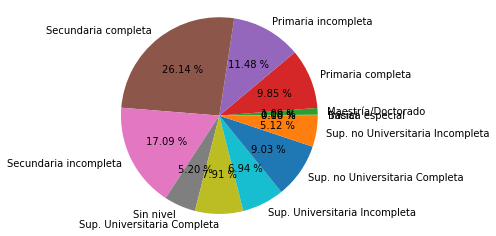

In [137]:
plt.pie(muestra.Mujer,labels=muestra.labels, autopct="%0.2f %%")
plt.axis("equal")
plt.show()

**Análisis descriptivo bivariado - Mujeres**

Condición del empleo vs estado civil

In [132]:
muestra=pd.crosstab(df_EstaCivil.EstCivil,columns=[df_EstaCivil.SitInformalidad[df_EstaCivil.sexo=='Mujer']],values=df_EstaCivil.fac500a,aggfunc=sum,normalize='index',colnames=[''])
muestra

,Empleo Informal,Empleo formal
EstCivil,,
Casado(a),0.742150,0.257850
Conviviente,0.841010,0.158990
Divorciado(a),0.499971,0.500029
Separado(a),0.769205,0.230795
Soltero(a),0.727346,0.272654
Viudo(a),0.863581,0.136419


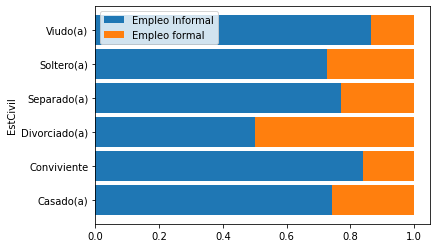

In [134]:
muestra.plot(kind = 'barh',stacked = 'True',width = 0.9)

Condición del empleo vs nivel de instrucción

In [138]:
muestra=pd.crosstab(df_NivIntruc.NivIntruc,columns=[df_NivIntruc.SitInformalidad[df_NivIntruc.sexo=='Mujer']],values=df_NivIntruc.fac500a,aggfunc=sum,normalize='index',colnames=[''])
muestra

,Empleo Informal,Empleo formal
NivIntruc,,
Básica especial,1.000000,0.000000
Inicial,1.000000,0.000000
Maestría/Doctorado,0.095849,0.904151
Primaria completa,0.937707,0.062293
Primaria incompleta,0.957979,0.042021
Secundaria completa,0.833521,0.166479
Secundaria incompleta,0.927533,0.072467
Sin nivel,0.984374,0.015626
Sup. Universitaria Completa,0.341795,0.658205


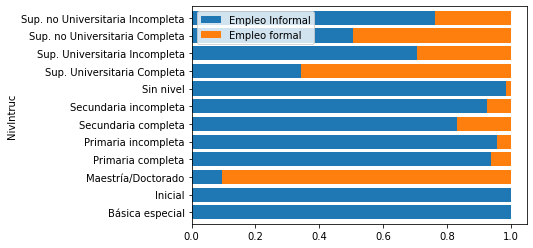

In [140]:
muestra.plot(kind = 'barh',stacked = 'True',width = 0.8)

Condición del empleo vs edad

In [175]:
df_edad=df
df_edad['edad']=df_edad['p208a']
df_edad=df_edad[df_edad.edad!=np.nan]
df_edad=df_edad[df_edad.edad!=99]
bins=[13,24,34,44,64,np.inf]
df_edad['cedad'] = pd.cut(x=df_edad['edad'], bins=bins)

In [176]:
muestra=pd.crosstab(df_edad.cedad,columns=[df_edad.SitInformalidad[df_edad.sexo=='Mujer']],values=df_edad.fac500a,aggfunc=sum,normalize='index',colnames=[''])
muestra

,Empleo Informal,Empleo formal
cedad,,
"(13.0, 24.0]",0.894968,0.105032
"(24.0, 34.0]",0.734125,0.265875
"(34.0, 44.0]",0.741809,0.258191
"(44.0, 64.0]",0.733793,0.266207
"(64.0, inf]",0.887574,0.112426


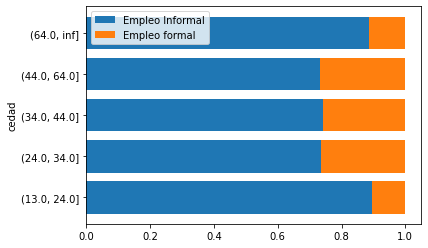

In [188]:
muestra.plot(kind = 'barh',stacked = 'True',width = 0.8)

**Análisis descriptivo comparativo - hombres y mujeres**

Nivel de instrucción

In [189]:
muestra=pd.crosstab(df_NivIntruc.NivIntruc,columns=[df_NivIntruc.sexo],values=df_NivIntruc.fac500a,aggfunc=sum,normalize='index',colnames=[''])
muestra

,Hombre,Mujer
NivIntruc,,
Básica especial,0.659250,0.340750
Inicial,0.486909,0.513091
Maestría/Doctorado,0.540541,0.459459
Primaria completa,0.479056,0.520944
Primaria incompleta,0.408999,0.591001
Secundaria completa,0.553367,0.446633
Secundaria incompleta,0.514121,0.485879
Sin nivel,0.198386,0.801614
Sup. Universitaria Completa,0.490355,0.509645


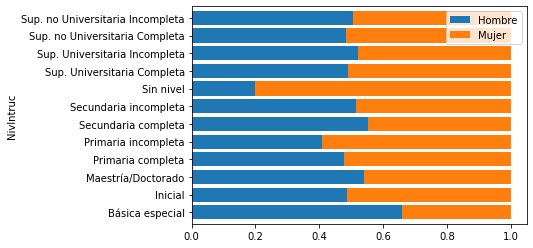

In [190]:
muestra.plot(kind = 'barh',stacked = 'True',width = 0.8)

In [213]:
muestra=pd.crosstab(df_NivIntruc.sexo,columns=[df_NivIntruc.NivIntruc],values=df_NivIntruc.fac500a,aggfunc=sum,normalize='index',colnames=[''])
muestra

,Básica especial,Inicial,Maestría/Doctorado,Primaria completa,Primaria incompleta,Secundaria completa,Secundaria incompleta,Sin nivel,Sup. Universitaria Completa,Sup. Universitaria Incompleta,Sup. no Universitaria Completa,Sup. no Universitaria Incompleta
sexo,,,,,,,,,,,,
Hombre,0.001886,0.000532,0.012970,0.091391,0.080093,0.326656,0.182370,0.012971,0.076722,0.076725,0.085115,0.052570
Mujer,0.000967,0.000556,0.010932,0.098546,0.114761,0.261433,0.170903,0.051970,0.079070,0.069389,0.090287,0.051186


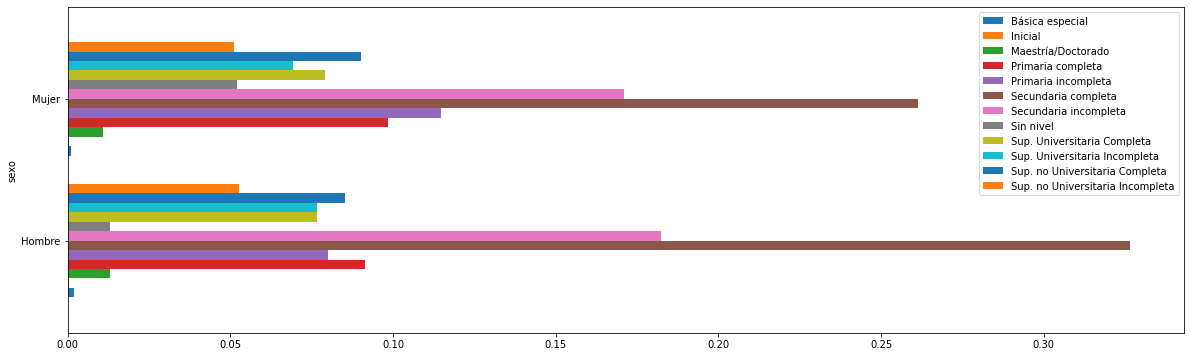

In [208]:
muestra.plot(kind = 'barh',width = 0.8,figsize=(20,6))

Estado civil

In [216]:
muestra=pd.crosstab(df_EstaCivil.EstCivil,columns=df_EstaCivil.sexo,values=df_EstaCivil.fac500a,aggfunc=sum,normalize='index',colnames=[''])
muestra

,Hombre,Mujer
EstCivil,,
Casado(a),0.506074,0.493926
Conviviente,0.519269,0.480731
Divorciado(a),0.329194,0.670806
Separado(a),0.333969,0.666031
Soltero(a),0.551479,0.448521
Viudo(a),0.245569,0.754431


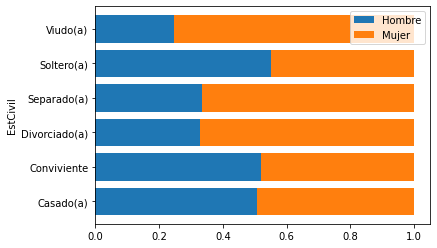

In [217]:
muestra.plot(kind = 'barh',stacked = 'True',width = 0.8)

In [218]:
muestra=pd.crosstab(df_EstaCivil.sexo,columns=[df_EstaCivil.EstCivil],values=df_EstaCivil.fac500a,aggfunc=sum,normalize='index',colnames=[''])
muestra

,Casado(a),Conviviente,Divorciado(a),Separado(a),Soltero(a),Viudo(a)
sexo,,,,,,
Hombre,0.236250,0.271382,0.003600,0.066665,0.402941,0.019162
Mujer,0.228592,0.249077,0.007274,0.131803,0.324891,0.058363


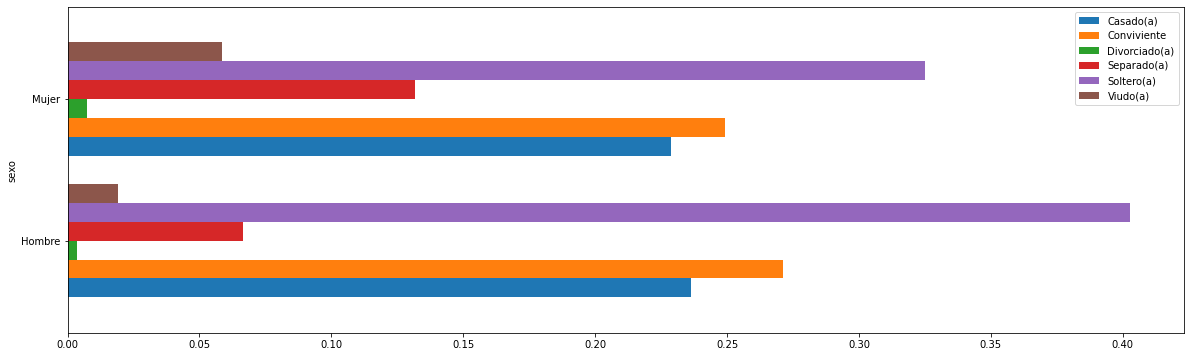

In [219]:
muestra.plot(kind = 'barh',width = 0.8,figsize=(20,6))